In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
mydata = np.genfromtxt("runs/Sim_Watts_1m_20170324_144414/out_watts",delimiter="\t")

In [3]:
clustc = [i[3] for i in mydata]
S_R_ratio = [i[0]/i[1] for i in mydata]

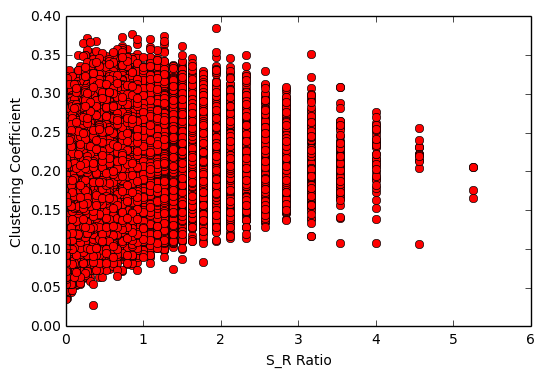

In [5]:
%matplotlib inline
plt.plot(S_R_ratio,clustc,'ro')
plt.xlabel("S_R Ratio")
plt.ylabel("Clustering Coefficient")
plt.show()

In [6]:

def count(a,b):
    miny  = round(min(b),3)
    minx = round(min(a),3)
    
    maxy = round(max(b),3)
    maxx = round(max(a),3)
    
    x = np.linspace(minx,maxx,(maxx-minx)*100+1)
    y = np.linspace(miny,maxy,(maxy-miny)*100+1)

    counts = np.zeros((len(y),len(x)))
    min_x = int(round(100*min(a)))
    min_y = int(round(100*min(b)))
    a1= [int(round(100 * i)) for i in a]
    b1= [int(round(100 * i)) for i in b]
    
    for i in range(len(a)):
        counts[b1[i]-min_y,a1[i]-min_x] +=1
        
    freq_vec = [0] * len(a)
    for i in range(len(a)):
        freq_vec[i]=counts[b1[i]-min_y,a1[i]-min_x]
    return [x,y,counts,freq_vec] 

In [7]:
x,y,z,freq_vec = count(clustc,S_R_ratio)
x, y = np.meshgrid(x, y)

In [8]:
print(len(x),len(y),len(z))

526 526 526


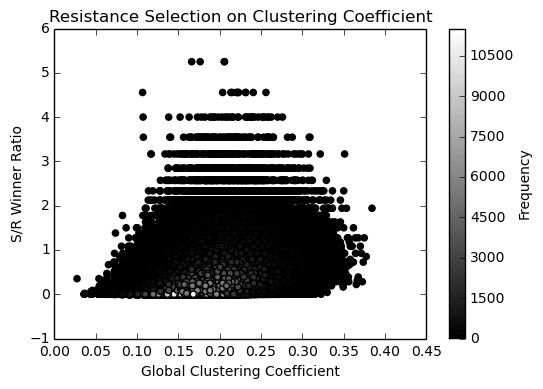

In [9]:
plt.scatter(clustc,S_R_ratio, c = freq_vec)
plt.gray() 
cbar = plt.colorbar(cmap=cm.gray(max(freq_vec)-min(freq_vec)))
cbar.set_label('Frequency')
plt.title("Resistance Selection on Clustering Coefficient")
plt.ylabel("S/R Winner Ratio ")
plt.xlabel("Global Clustering Coefficient")
plt.show()

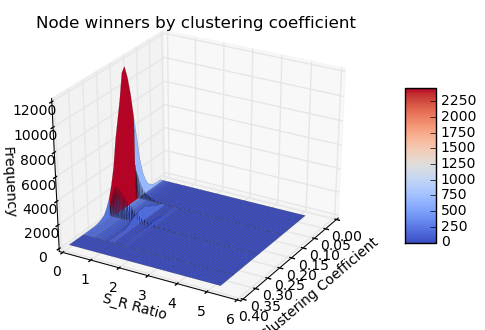

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                       linewidth=0.1)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Node winners by clustering coefficient')

xLabel = ax.set_xlabel('\nClustering Coefficient')
yLabel = ax.set_ylabel('S_R Ratio')
zLabel = ax.set_zlabel('\nFrequency')
ax.view_init(azim=30)

plt.show()

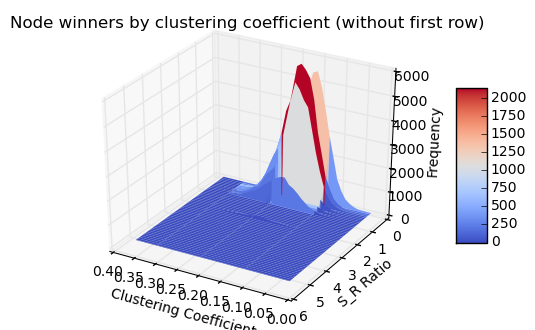

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x[2:],y[2:],z[2:],cmap=cm.coolwarm,
                       linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Node winners by clustering coefficient (without first row)')

xLabel = ax.set_xlabel('\nClustering Coefficient')
yLabel = ax.set_ylabel('S_R Ratio')
zLabel = ax.set_zlabel('\nFrequency')
ax.view_init(azim=120)

plt.show()